# Loading Dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
dataset = pd.read_csv('/home/vanchhit/Downloads/heart1.csv')
dataset

/home/vanchhit/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,0


In [2]:
print(dataset.shape)

(303, 13)


# Data Exploration

In [3]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

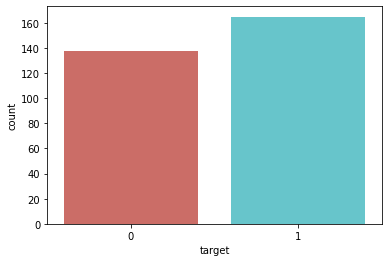

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x= 'target',data = dataset, palette = 'hls')
plt.show()

# Split the data into features (X) and target (y) label sets

In [5]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [6]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2
301,57,1,0,130,131,0,1,115,1,1.2,1,1


In [7]:
y

,target
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# Split the data into a training and test set

In [8]:
# Import module to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and Train the Model

In [9]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

# Predicting the test set results

In [10]:
y_pred = logmodel.predict(X_test)

In [11]:
y_pred_prob = logmodel.predict_proba(X_test)
y_pred_prob

array([[0.99474098, 0.00525902],
       [0.19931865, 0.80068135],
       [0.90937057, 0.09062943],
       [0.99048934, 0.00951066],
       [0.96405801, 0.03594199],
       [0.9948259 , 0.0051741 ],
       [0.9845389 , 0.0154611 ],
       [0.37592537, 0.62407463],
       [0.99436429, 0.00563571],
       [0.0144652 , 0.9855348 ],
       [0.63731992, 0.36268008],
       [0.88014595, 0.11985405],
       [0.23377028, 0.76622972],
       [0.62798782, 0.37201218],
       [0.70028923, 0.29971077],
       [0.05841231, 0.94158769],
       [0.01308263, 0.98691737],
       [0.98140785, 0.01859215],
       [0.55551029, 0.44448971],
       [0.13958968, 0.86041032],
       [0.02265407, 0.97734593],
       [0.97288709, 0.02711291],
       [0.17672642, 0.82327358],
       [0.02522643, 0.97477357],
       [0.01795363, 0.98204637],
       [0.30852296, 0.69147704],
       [0.99448186, 0.00551814],
       [0.01792905, 0.98207095],
       [0.13100417, 0.86899583],
       [0.00813515, 0.99186485],
       [0.

In [12]:
y_test

,target
204,0
159,1
219,0
174,0
184,0
...,...
0,1
288,0
259,0
179,0


In [13]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

# Calculating the accuracy

In [14]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.7377049180327869


# Evaluate model using Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[20 10]
 [ 6 25]]


The result is telling us that we have 20+25 correct predictions and 10+6 incorrect predictions.

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



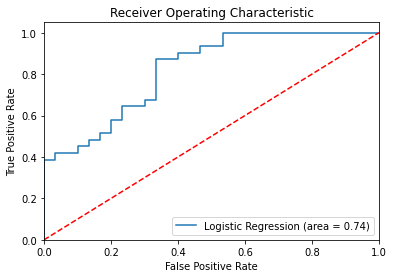

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Note: The receiver operating characteristic (ROC) curve is used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

Judging from this we can say our classifier model was good enough with a 73% Accuracy.